# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass=10
shufflePixels = True
shuffleLabels = False

In [5]:
# Load data
x_train, y_train, x_test, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(50000, 32, 32, 3)
(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


Populating the interactive namespace from numpy and matplotlib


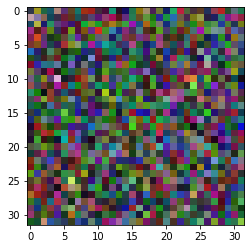

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

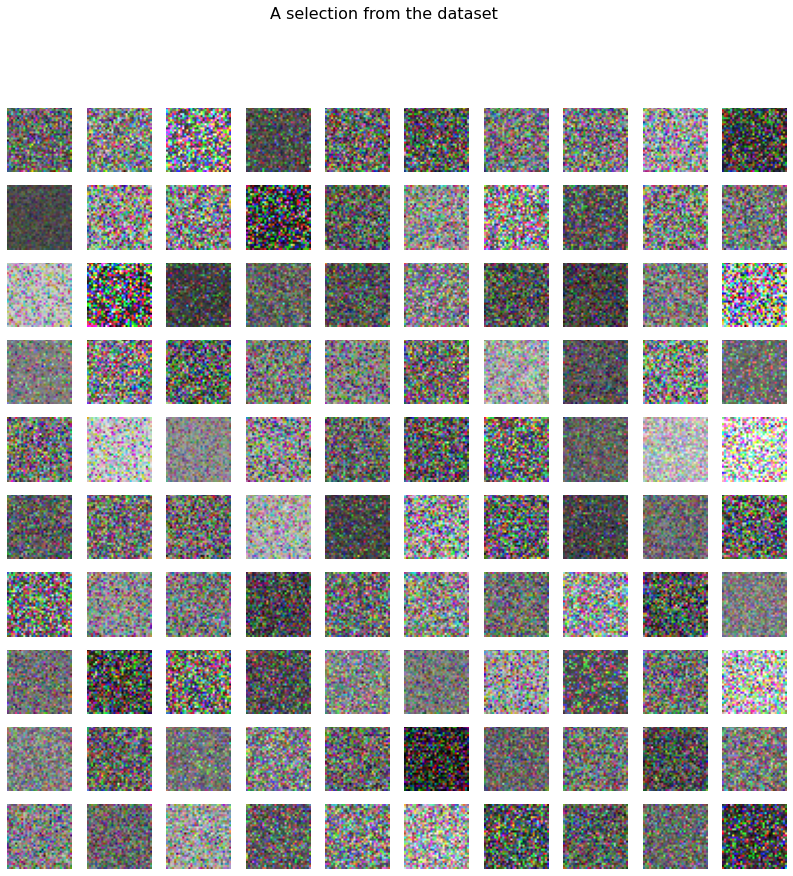

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 13s 40ms/step - loss: 2.3103 - accuracy: 0.1000
test loss, test acc: [2.3102991580963135, 0.10000000149011612]
Evaluate on test data
20/20 [==============================] - 1s 69ms/step - loss: 2.3102 - accuracy: 0.1000
test loss, test acc: [2.310190439224243, 0.10000000149011612]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 18s 33ms/step - loss: 2.2654 - accuracy: 0.1363 - val_loss: 2.2378 - val_accuracy: 0.1615
Epoch 2/250
500/500 [==============================] - 16s 32ms/step - loss: 2.2322 - accuracy: 0.1560 - val_loss: 2.2388 - val_accuracy: 0.1587
Epoch 3/250
500/500 [==============================] - 16s 32ms/step - loss: 2.2219 - accuracy: 0.1672 - val_loss: 2.2350 - val_accuracy: 0.1529
Epoch 4/250
500/500 [==============================] - 16s 31ms/step - loss: 2.2118 - accuracy: 0.1759 - val_loss: 2.2008 - val_accuracy: 0.1820
Epoch 5/250
500/500 [==============================] - 16s 32ms/step - loss: 2.2015 - accuracy: 0.1846 - val_loss: 2.1839 - val_accuracy: 0.2010
Epoch 6/250
500/500 [==============================] - 16s 32ms/step - loss: 2.1942 - accuracy: 0.1896 - val_loss: 2.1784 - val_accuracy: 0.2043
Epoch 7/250
500/500 [==============================] - 16s 32ms/step - loss: 2.1876 - accuracy: 0.1908 - val_loss: 2.1726 - val_ac

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 3s 31ms/step - loss: 0.0151 - accuracy: 0.9953
test loss, test acc: [0.0150876110419631, 0.9953200221061707]
Evaluate on test data
20/20 [==============================] - 1s 30ms/step - loss: 10.0443 - accuracy: 0.1223
test loss, test acc: [10.04429817199707, 0.12229999899864197]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 1s 9ms/step - loss: 37.9793 - accuracy: 0.1059
test loss, test acc: [37.97931671142578, 0.10592000186443329]
Evaluate on test data
20/20 [==============================] - 0s 11ms/step - loss: 38.2756 - accuracy: 0.1053
test loss, test acc: [38.275630950927734, 0.10530000180006027]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 5s 9ms/step - loss: 4.2602 - accuracy: 0.1045 - val_loss: 2.2789 - val_accuracy: 0.1218
Epoch 2/250
500/500 [==============================] - 4s 8ms/step - loss: 2.2845 - accuracy: 0.1260 - val_loss: 2.2608 - val_accuracy: 0.1406
Epoch 3/250
500/500 [==============================] - 4s 9ms/step - loss: 2.2684 - accuracy: 0.1354 - val_loss: 2.2432 - val_accuracy: 0.1484
Epoch 4/250
500/500 [==============================] - 4s 8ms/step - loss: 2.2591 - accuracy: 0.1369 - val_loss: 2.2483 - val_accuracy: 0.1534
Epoch 5/250
500/500 [==============================] - 4s 9ms/step - loss: 2.2517 - accuracy: 0.1418 - val_loss: 2.2424 - val_accuracy: 0.1574
Epoch 6/250
500/500 [==============================] - 4s 8ms/step - loss: 2.2458 - accuracy: 0.1465 - val_loss: 2.2465 - val_accuracy: 0.1509
Epoch 7/250
500/500 [==============================] - 4s 8ms/step - loss: 2.2389 - accuracy: 0.1498 - val_loss: 2.2414 - val_accuracy: 0.1571

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 1s 7ms/step - loss: 2.1274 - accuracy: 0.2327
test loss, test acc: [2.127406358718872, 0.23270000517368317]
Evaluate on test data
20/20 [==============================] - 0s 7ms/step - loss: 2.4295 - accuracy: 0.1403
test loss, test acc: [2.429514169692993, 0.14030000567436218]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 6s 45ms/step - loss: 3.7704 - accuracy: 0.1082
test loss, test acc: [3.770374298095703, 0.10815999656915665]
Evaluate on test data
20/20 [==============================] - 1s 59ms/step - loss: 3.7754 - accuracy: 0.1041
test loss, test acc: [3.7754039764404297, 0.10409999638795853]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 23s 41ms/step - loss: 2.3281 - accuracy: 0.1657 - val_loss: 2.1926 - val_accuracy: 0.1927
Epoch 2/250
500/500 [==============================] - 20s 41ms/step - loss: 2.1626 - accuracy: 0.2039 - val_loss: 2.1901 - val_accuracy: 0.1813
Epoch 3/250
500/500 [==============================] - 20s 40ms/step - loss: 2.0833 - accuracy: 0.2411 - val_loss: 2.2197 - val_accuracy: 0.1815
Epoch 4/250
500/500 [==============================] - 20s 40ms/step - loss: 1.9555 - accuracy: 0.2980 - val_loss: 2.3088 - val_accuracy: 0.1816
Epoch 5/250
500/500 [==============================] - 20s 40ms/step - loss: 1.7661 - accuracy: 0.3736 - val_loss: 2.3918 - val_accuracy: 0.1719
Epoch 6/250
500/500 [==============================] - 20s 40ms/step - loss: 1.5359 - accuracy: 0.4688 - val_loss: 2.6235 - val_accuracy: 0.1602
Epoch 7/250
500/500 [==============================] - 20s 40ms/step - loss: 1.2953 - accuracy: 0.5593 - val_loss: 2.7875 - val_ac

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 4s 41ms/step - loss: 0.0025 - accuracy: 0.9995
test loss, test acc: [0.002466233680024743, 0.9995399713516235]
Evaluate on test data
20/20 [==============================] - 1s 39ms/step - loss: 7.1838 - accuracy: 0.1579
test loss, test acc: [7.183802127838135, 0.15790000557899475]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 9s 63ms/step - loss: 5.7406 - accuracy: 0.1090
test loss, test acc: [5.740565776824951, 0.10903999954462051]
Evaluate on test data
20/20 [==============================] - 2s 106ms/step - loss: 5.7462 - accuracy: 0.1083
test loss, test acc: [5.746217250823975, 0.10830000042915344]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
500/500 [==============================] - 22s 41ms/step - loss: 2.3052 - accuracy: 0.1188 - val_loss: 2.2476 - val_accuracy: 0.1791
Epoch 2/250
500/500 [==============================] - 20s 40ms/step - loss: 2.2282 - accuracy: 0.1749 - val_loss: 2.2278 - val_accuracy: 0.1731
Epoch 3/250
500/500 [==============================] - 20s 40ms/step - loss: 2.1748 - accuracy: 0.1894 - val_loss: 2.1742 - val_accuracy: 0.1872
Epoch 4/250
500/500 [==============================] - 20s 40ms/step - loss: 2.1654 - accuracy: 0.1944 - val_loss: 2.1657 - val_accuracy: 0.1977
Epoch 5/250
500/500 [==============================] - 20s 40ms/step - loss: 2.1608 - accuracy: 0.1956 - val_loss: 2.1645 - val_accuracy: 0.1930
Epoch 6/250
500/500 [==============================] - 20s 40ms/step - loss: 2.1584 - accuracy: 0.2002 - val_loss: 2.1840 - val_accuracy: 0.1839
Epoch 7/250
500/500 [==============================] - 20s 40ms/step - loss: 2.1564 - accuracy: 0.1996 - val_loss: 2.1629 - val_ac

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
98/98 [==============================] - 5s 52ms/step - loss: 0.0267 - accuracy: 0.9907
test loss, test acc: [0.026661936193704605, 0.9906799793243408]
Evaluate on test data
20/20 [==============================] - 1s 52ms/step - loss: 6.0671 - accuracy: 0.1589
test loss, test acc: [6.067088603973389, 0.15889999270439148]


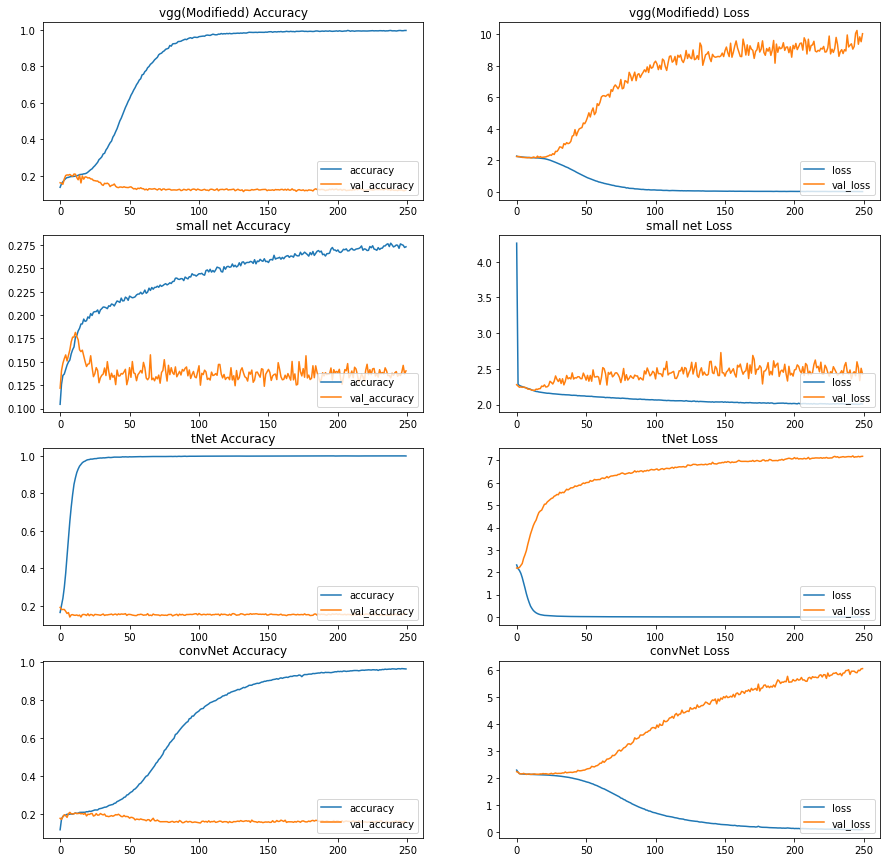

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modifiedd)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1


In [25]:
add noraliztion
does reducing conv layers have significant impact? directly related to number of parameters

SyntaxError: ignored